# 现代统计方法期中报告

**202228000206058 孟丽媛**

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**1. 用拒绝接受法产生500个服从Beta(2,9)的样本，作直方图并给出接受率。**

In [2]:
def sample_ar_beta(alpha,beta,N):
    c = math.factorial(alpha+beta-1) / (math.factorial(alpha-1)*math.factorial(beta-1))
    N = math.ceil(N * c)
    x = np.random.rand(N)
    ac_bound = x**(alpha-1) * (1-x)**(beta-1)
    u = np.random.rand(N)
    sample = x[u<ac_bound]
    return len(sample), sample, 1/c

In [3]:
len_beta_sample, beta_sample, ar_rate = sample_ar_beta(2,9,500)

In [4]:
len_beta_sample, ar_rate

(543, 0.011111111111111112)

In [1]:
plt.hist(beta_sample[:500],bins=25,density=True)
plt.title("Beta(2,9)")
plt.ylabel("sample density")
plt.show()

NameError: name 'plt' is not defined

**2. 用接受拒绝法产生1000个二维正态分布样本，比较样本相关系数与实际的差异。**

In [6]:
def sample_inverse_de(mu,sigma,N):
    u = np.random.rand(N)
    y = np.array([(sigma*np.log(2*x) + mu) if x<0.5 else (mu - sigma*np.log(2-2*x)) for x in u])
    return y

In [7]:
def sample_ar_gaussian_2d(N):
    c = (8*math.exp(1.25)) / (math.pi*math.sqrt(15))
    N = math.ceil(N * c)
    x = sample_inverse_de(0,1,N)
    y = sample_inverse_de(0,1,N)
    ac_bound = np.exp(-(8*(x*x-0.5*x*y+y*y)/15) + np.abs(x) + np.abs(y)-1.25)
    u = np.random.rand(N)
    sample = np.array(list(zip(x[u<ac_bound],y[u<ac_bound])))
    return len(sample), sample

In [8]:
len_gaussian_2d_sample, gaussian_2d_sample = sample_ar_gaussian_2d(1000)

In [9]:
len_gaussian_2d_sample

1012

In [10]:
np.corrcoef(gaussian_2d_sample[:,:1000].T)

array([[1.        , 0.27850627],
       [0.27850627, 1.        ]])

**3. Metropolis-Hasting产生标准正态分布，转移概率为$g(x|y)=\frac{1}{2}e^{-|x-y|}$. 产生1000个样本，据此计算95%分位数，97.5%分位数，方差。**

In [11]:
def density_gaussian_std(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

In [12]:
def sample_mh_gaussian_std(N):
    x = 0
    burn_in = 30000
    for i in range(burn_in):
        y = sample_inverse_de(x,1,1)
        r = density_gaussian_std(y)/density_gaussian_std(x)
        if r > 1:
            x = y
        else:
            u = np.random.rand()
            if u < r:
                x = y
    sample = np.zeros(N)
    for i in range(N):
        y = sample_inverse_de(x,1,1)
        r = density_gaussian_std(y)/density_gaussian_std(x)
        if r > 1:
            sample[i] = y
            x = y
        else:
            u = np.random.rand()
            if u < r:
                sample[i] = y
                x = y
            else:
                sample[i] = x
    return len(sample), sample

In [13]:
len_gaussian_std_sample, gaussian_std_sample = sample_mh_gaussian_std(1000)

In [14]:
np.percentile(gaussian_std_sample, 95)

1.9819708900147883

In [15]:
np.percentile(gaussian_std_sample, 97.5)

2.3128811315753777

In [16]:
np.var(gaussian_std_sample, ddof = 1)

0.9926200691878266

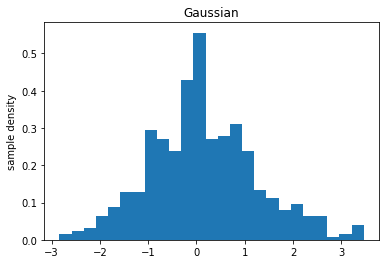

In [17]:
plt.hist(gaussian_std_sample[:500],bins=25,density=True)
plt.title("Gaussian")
plt.ylabel("sample density")
plt.show()

**4. X服从标准正态分布，估计$\theta = P(X<1)$，给出令估计的方差小于等于$10^{-6}$时各方法所需样本量的数量级。**

(1)$\theta = \int_{-\infty}^{1}f(x)dx$，用标准正态分布采样。

In [18]:
N = 10000
sample = np.random.normal(loc=0.0, scale=1.0, size=N)
h = np.array([(sample<1)+0])
theta = np.sum(h) / N
var = (np.linalg.norm(h-theta, ord=2))**2 / (N*(N-1))
theta, var

(0.841, 1.3373237323732859e-05)

In [19]:
N = 90000
sample = np.random.normal(loc=0.0, scale=1.0, size=N)
h = np.array([(sample<1)+0])
theta = np.sum(h) / N
var = (np.linalg.norm(h-theta, ord=2))**2 / (N*(N-1))
theta, var

(0.8398777777777777, 1.4942732271788046e-06)

估计的方差小于等于$10^{-6}$时所需样本量的数量级为$10^{5}$.

(2)$\theta = 1-\frac{1}{2}P(|X|>1)$，用标准正态分布采样。

In [20]:
N = 10000
sample = np.random.normal(loc=0.0, scale=1.0, size=N)
h = np.array([(np.abs(sample)>1)+0])
theta = 1 - np.sum(h) / (2*N)
var = (np.linalg.norm(h-theta, ord=2))**2 / (4*N*(N-1))
theta, var

(0.8469, 1.2621213371336748e-05)

In [21]:
N = 90000
sample = np.random.normal(loc=0.0, scale=1.0, size=N)
h = np.array([(np.abs(sample)>1)+0])
theta = 1 - np.sum(h) / (2*N)
var = (np.linalg.norm(h-theta, ord=2))**2 / (4*N*(N-1))
theta, var

(0.8416777777777777, 1.3667950237165486e-06)

估计的方差小于等于$10^{-6}$时所需样本量的数量级为$10^{5}$.

(3)$\theta = \frac{1}{2} + P(0<X<1) = \frac{1}{2} + \int_{0}^{1}f(x)dx$，用标准正态分布采样。

In [22]:
N = 10000
sample = np.random.normal(loc=0.0, scale=1.0, size=N)
h = np.array([np.logical_and(sample>0,sample<1)+0])
theta = 0.5 + np.sum(h) / N
var = np.linalg.norm(h-theta+0.5, ord=2)**2 / (N*(N-1))
theta, var

(0.8392999999999999, 2.2419792979298846e-05)

In [23]:
N = 90000
sample = np.random.normal(loc=0.0, scale=1.0, size=N)
h = np.array([np.logical_and(sample>0,sample<1)+0])
theta = 0.5 + np.sum(h) / N
var = np.linalg.norm(h-theta+0.5, ord=2)**2 / (N*(N-1))
theta, var

(0.8441777777777778, 2.5080215898146706e-06)

估计的方差小于等于$10^{-6}$时所需样本量的数量级为$10^{5}$.

(4)$\theta = \frac{1}{2} + P(0<X<1) = \frac{1}{2} + \int_{0}^{1}f(x)dx$，用$U(0,1)$分布采样。

In [24]:
N = 900
x = np.random.rand(N)
h = np.exp(-0.5*x*x) / np.sqrt(2*np.pi)
theta = 0.5 + np.sum(h) / N
var = np.linalg.norm(h-theta+0.5, ord=2)**2 / (N*(N-1))
theta, var

(0.8416703836162629, 2.540406316762048e-06)

In [25]:
N = 100
x = np.random.rand(N)
h = np.exp(-0.5*x*x) / np.sqrt(2*np.pi)
theta = 0.5 + np.sum(h) / N
var = np.linalg.norm(h-theta+0.5, ord=2)**2 / (N*(N-1))
theta, var

(0.839098998020628, 2.4034415509903063e-05)

估计的方差小于等于$10^{-6}$时所需样本量的数量级为$10^{3}$.

(5)$\theta = \frac{1}{2} + P(0<X<1) = \frac{1}{2} + \int_{0}^{1}f(x)dx$，用importance function为$p(x) = \frac{e}{e-1}e^{-x},0 \leq x \leq 1$分布采样。

In [26]:
def sample_inverse_exp(N):
    u = np.random.rand(N)
    x = -np.log(1-(np.e-1)*u/np.e)
    return x

In [27]:
N = 900
x = sample_inverse_exp(N)
w = (np.e-1) * np.exp(x) / np.e
h = np.exp(-0.5*x*x) / np.sqrt(2*np.pi)
theta = 0.5 + np.dot(w,h) / N
var = np.linalg.norm(w*h-theta+0.5, ord=2)**2 / (N*(N-1))
theta, var

(0.8421724514899398, 2.8373083893179666e-06)

In [28]:
N = 100
x = sample_inverse_exp(N)
w = (np.e-1) * np.exp(x) / np.e
h = np.exp(-0.5*x*x) / np.sqrt(2*np.pi)
theta = 0.5 + np.dot(w,h) / N
var = np.linalg.norm(w*h-theta+0.5, ord=2)**2 / (N*(N-1))
theta, var

(0.8381404686036662, 2.7890670858438952e-05)

估计的方差小于等于$10^{-6}$时所需样本量的数量级为$10^{3}$.

(6)$\theta = \frac{1}{2} + P(0<X<1) = \frac{1}{2} + \int_{0}^{1}f(x)dx$，用$U(0,1)$分布采样并使用对偶抽样缩减方差。

In [29]:
N = 900
N = math.ceil(0.5*N)*2
x = np.random.rand(math.ceil(0.5*N))
x = np.concatenate((x,1-x))
h = np.exp(-0.5*x*x) / np.sqrt(2*np.pi)
theta = 0.5 + np.sum(h) / N
var = np.linalg.norm(h-theta+0.5, ord=2)**2 / (N*(N-1))
theta, var

(0.8411069612043289, 2.6623438693123926e-06)

In [30]:
N = 100
N = math.ceil(0.5*N)*2
x = np.random.rand(math.ceil(0.5*N))
x = np.concatenate((x,1-x))
h = np.exp(-0.5*x*x) / np.sqrt(2*np.pi)
theta = 0.5 + np.sum(h) / N
var = np.linalg.norm(h-theta+0.5, ord=2)**2 / (N*(N-1))
theta, var

(0.8423366756253328, 2.16302543414796e-05)

估计的方差小于等于$10^{-6}$时所需样本量的数量级为$10^{3}$.

(7)$\theta = \frac{1}{2} + P(0<X<1) = \frac{1}{2} + \int_{0}^{1}f(x)dx$，用$U(0,1)$分布采样并使用对偶抽样和控制变量缩减方差。

In [31]:
N = 900
N = math.ceil(0.5*N)*2
x = np.random.rand(math.ceil(0.5*N))
x = np.concatenate((x,1-x))
h = np.exp(-0.5*x*x) / np.sqrt(2*np.pi)
h_c = h - np.sum(h) / N
phi_c = -x*x + x - 1/6
lam = np.dot(h_c,phi_c) / np.linalg.norm(phi_c, ord=2)**2
theta = 0.5 + (np.sum(h)-lam*np.sum(phi_c)) / N
var = np.linalg.norm(h-lam*phi_c-theta+0.5, ord=2)**2 / (N*(N-1))
theta, var

(0.8413486627198006, 2.5599689926404156e-06)

In [32]:
N = 100
N = math.ceil(0.5*N)*2
x = np.random.rand(math.ceil(0.5*N))
x = np.concatenate((x,1-x))
h = np.exp(-0.5*x*x) / np.sqrt(2*np.pi)
h_c = h - np.sum(h) / N
phi_c = -x*x + x - 1/6
lam = np.dot(h_c,phi_c) / np.linalg.norm(phi_c, ord=2)**2
theta = 0.5 + (np.sum(h)-lam*np.sum(phi_c)) / N
var = np.linalg.norm(h-lam*phi_c-theta+0.5, ord=2)**2 / (N*(N-1))
theta, var

(0.8412887864578322, 2.651108100887064e-05)

估计的方差小于等于$10^{-6}$时所需样本量的数量级为$10^{3}$.

**5. $ln(X)$服从标准正态分布，$lnY = -2 + 1.5lnX + \epsilon$，$\epsilon$服从标准正态分布，与$X$独立。估计$\theta = E(Y)$，比较令估计的方差为$10^{-6}$时标准MC方法与Rao-Blackwell方法所需样本量的数量级。**

In [33]:
N = 1000000
lx = np.random.normal(loc=0.0, scale=1.0, size=N)
epi = np.random.normal(loc=0.0, scale=1.0, size=N)
sample = np.exp(1.5*lx+epi-2)
theta = np.sum(sample) / N
var = np.linalg.norm(sample-theta, ord=2)**2 / (N*(N-1))
theta, var

(0.6842768770301606, 1.0299573612112647e-05)

In [34]:
N = 3000000
lx = np.random.normal(loc=0.0, scale=1.0, size=N)
epi = np.random.normal(loc=0.0, scale=1.0, size=N)
sample = np.exp(1.5*lx+epi-2)
theta = np.sum(sample) / N
var = np.linalg.norm(sample-theta, ord=2)**2 / (N*(N-1))
theta, var

(0.6881082510923466, 4.6589671576802225e-06)

标准MC方法估计的方差为$10^{-6}$时所需样本量的数量级为$10^{6}$.

In [35]:
N = 100000
lx = np.random.normal(loc=0.0, scale=1.0, size=N)
sample = np.exp(1.5*(lx-1))
theta = np.sum(sample) / N
var = np.linalg.norm(sample-theta, ord=2)**2 / (N*(N-1))
theta, var

(0.6858050989423096, 3.998627503275735e-05)

In [36]:
N = 900000
lx = np.random.normal(loc=0.0, scale=1.0, size=N)
sample = np.exp(1.5*(lx-1))
theta = np.sum(sample) / N
var = np.linalg.norm(sample-theta, ord=2)**2 / (N*(N-1))
theta, var

(0.687602521607281, 4.632908566203816e-06)

Rao-Blackwell方法估计的方差为$10^{-6}$时所需样本量的数量级为$10^{5}$.

**6. 对腐蚀损失y和含铁量x做线性回归$y = \beta_{0}+\beta_{1}x+\epsilon$**

In [37]:
data = pd.read_csv('Ex6.txt',header=None,sep="\t")
data = data.iloc[:,1:].to_numpy()

(1)拟合直线得到$\hat{\beta_{0}},\hat{\beta_{1}}$，并估计它们的方差和协方差。

In [38]:
[beta1,beta0] = np.polyfit(data[0,:],data[1,:],deg=1)
epi_d = data[1,:] - beta0 - beta1*data[0,:]
n = len(data[0,:])

In [39]:
beta0,beta1

(129.786599277239, -24.019893445295757)

In [40]:
def bootstrap(x,beta0,beta1,epi_d,n,B):
    sample_beta0 = np.zeros(B)
    sample_beta1 = np.zeros(B)
    for i in range(B):
        epi_sample = np.random.choice(epi_d,n)
        y_sample = beta0 + beta1*x + epi_sample
        [beta1_sample,beta0_sample] = np.polyfit(x,y_sample,deg=1)
        sample_beta0[i] = beta0_sample
        sample_beta1[i] = beta1_sample
    return sample_beta0,sample_beta1

In [41]:
B = 10000
sample_beta0,sample_beta1 = bootstrap(data[0,:],beta0,beta1,epi_d,n,B)
var_beta0 = np.linalg.norm(sample_beta0-np.mean(sample_beta0), ord=2)**2 / (B-1)
var_beta1 = np.linalg.norm(sample_beta1-np.mean(sample_beta1), ord=2)**2 / (B-1)
cor_beta0_beta1 = np.dot(sample_beta0-np.mean(sample_beta0), sample_beta1-np.mean(sample_beta1)) / (B-1)

In [42]:
var_beta0,var_beta1,cor_beta0_beta1

(1.6673124269284905, 1.4150900743686798, -1.2312555715244515)

(2)估计$\theta = \frac{\beta1}{\beta0}$并给出其方差的估计。

In [43]:
theta = beta1/beta0
theta

-0.18507221530619292

In [44]:
var_theta = var_beta0/beta1**2 + var_beta1*beta0**2/beta1**4 - 2*cor_beta0_beta1*beta0/beta1**3
var_theta

0.05143562098266627

(3)用Bootstrap方法模拟估计$\hat{\theta}$的分布，并绘制直方图。

In [45]:
sample_theta = sample_beta1/sample_beta0

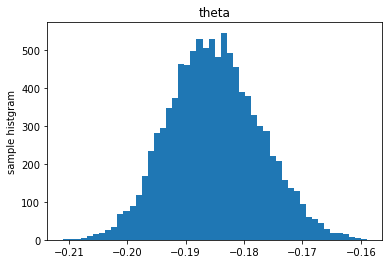

In [46]:
plt.hist(sample_theta,bins=50)
plt.title("theta")
plt.ylabel("sample histgram")
plt.show()

(4)给出估计$\hat{\theta}$的95%置信区间和95%t区间。

In [47]:
interval_95 = theta - np.array([np.percentile(sample_theta-theta, 5/2), np.percentile(sample_theta-theta, 100-5/2)])
interval_95

array([-0.17051251, -0.20071004])

In [48]:
def bootstrap_nested(x,beta0,beta1,epi_d,n,B):
    sample_theta = np.zeros(B)
    sample_theta_s = np.zeros(B)
    for i in range(B):
        epi_sample = np.random.choice(epi_d,n)
        y_sample = beta0 + beta1*x + epi_sample
        [beta1_sample,beta0_sample] = np.polyfit(x,y_sample,deg=1)
        sample_theta[i] = beta1_sample/beta0_sample
        for j in range(50):
            sample_for_sample_theta = np.zeros(50)
            epi_sample_for_sample = np.random.choice(epi_sample,n)
            y_sample = beta0 + beta1*x + epi_sample_for_sample
            [beta1_sample,beta0_sample] = np.polyfit(x,y_sample,deg=1)
            sample_for_sample_theta[j] = beta1_sample/beta0_sample
        sample_theta_s[i] = np.linalg.norm(sample_for_sample_theta-np.mean(sample_for_sample_theta), ord=2) / 7
    return sample_theta,sample_theta_s

In [49]:
B = 1000
sample_theta,sample_theta_s = bootstrap_nested(data[0,:],beta0,beta1,epi_d,n,B)
sample_theta_n = (sample_theta - theta) / sample_theta_s

In [50]:
theta_s = np.sqrt(np.linalg.norm(sample_theta-np.mean(sample_theta), ord=2)**2 / (B-1))
interval_t_95 = theta - theta_s*np.array([np.percentile(sample_theta_n, 5/2), np.percentile(sample_theta_n, 100-5/2)])
interval_t_95

array([-0.1811645 , -0.18960275])

(5)用Bootstrap矫正$\hat{\theta}$的偏倚。

In [51]:
theta_new = 2*theta - np.mean(sample_theta)
theta_new

-0.18516777287384556